In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
from models.RPS import readable_to_df_list
from utils.measures import calculate_noise_stability

In [41]:
pre_df = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-19-11-41-05/results.csv')
pre_df = readable_to_df_list(pre_df, columns=['stocks'])

df = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-10-34-26/noised_results.csv')
df = readable_to_df_list(df, columns=['stocks'])

In [42]:
stability_df = pd.DataFrame(index=list(range(len(df))), columns=list(range(len(pre_df))), dtype=float)

for i in range(len(df)):
    for j in range(len(pre_df)):
        distance = calculate_noise_stability(
            set(df.loc[i, 'stocks']),
            set(pre_df.loc[j, 'stocks'])
        )
        stability_df.loc[i, j] = distance

In [43]:
rps_stb = stability_df

<AxesSubplot:>

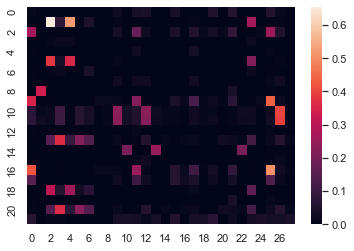

In [44]:
sns.heatmap(rps_stb, vmin=0)

In [45]:
pre_df = pd.read_csv('../exp/Mantegna/Mantegna_sp500_2021-Sep-21-13-38-58/mantegna_results.csv')
pre_df = readable_to_df_list(pre_df, columns=['stocks'])
df = pd.read_csv('../exp/Mantegna/Mantegna_sp500_2021-Sep-21-14-32-22/mantegna_noised_results.csv')
df = readable_to_df_list(df, columns=['stocks'])

In [47]:
stability_df = pd.DataFrame(index=list(range(len(df))), columns=list(range(len(pre_df))), dtype=float)

for i in range(len(df)):
    for j in range(len(pre_df)):
        distance = calculate_noise_stability(
            set(df.loc[i, 'stocks']),
            set(pre_df.loc[j, 'stocks'])
        )
        stability_df.loc[i, j] = distance

In [48]:
mtg_stb = stability_df

<AxesSubplot:>

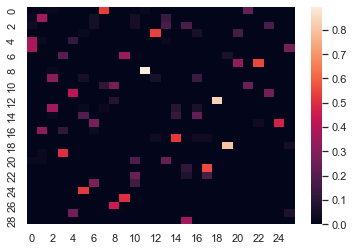

In [49]:
sns.heatmap(mtg_stb, vmin=0)

<AxesSubplot:>

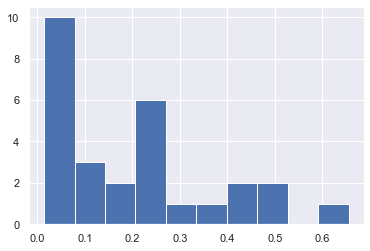

In [54]:
rps_stb.max().hist()

<AxesSubplot:>

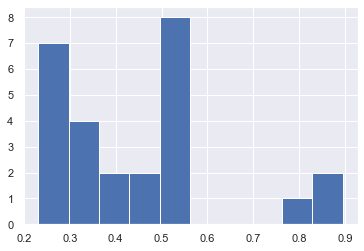

In [55]:
mtg_stb.max().hist()